![alt text](img/LM.png)
# Kurs: Warsztaty Machine Learning w Pythonie

## Prowadzący: Piotr Ćwiakowski

## Autorzy: Piotr Ćwiakowski, Maciej Wilamowski

### Lekcja 5. Model SVM 

#### Spis treści:

1. Opis algorytmu.  
2. Estymacja SVM w Pythonie

# 1. Opis algorytmu

## 1.1. Wprowadzenie
Jednym z podstawowych klasyfikatorów jest maszyna wektorów nośnych (ang. *Support Vector Machines - SVM*). U podłoża teoretycznego tego algorytmu leży jedno podstawowe założenie. W pewnej wielowymiarowej przestrzeni (zbiór zmiennych objaśniających) istnieje płaszczyzna, która separuje klasyfikowane grupy. Płaszczyzna ta zrobi to w sposób optymalny, jeżeli odległość od tej płaszczyzny do najbliższych punktów w poszczególnych klasach będzie maksymalna.

W przypadku wpełni separowalnym, te obserwacja na podstawie których wyznaczona zostanie przestrzeń rozdzielająca klasy to właśnie wektory nośne. Każda obserwacja może być wielowymiarowa, stanowi więc wektor. W oparciu o te wektory "opieramy" przestrzeń rozdzielającą, stąd nazwa wektory nośne. 

Parafrazując, chcemy rozdzielić grupy (klasy) linią (hiperpłaszczyzną) w taki sposób aby przebiegała możliwie po środku przestrzeni rozdzielającej klasy. Zastanówmy się, co to znaczy w "możliwie najlepszy sposób". Spójrzmy na poniższy obraz.

<img src="img/svm_MA.png">
Źródło: https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93

Na pierwszy rzut oka widać, że lewa linia dzieli "gorzej". Ponieważ niektóre elementy są bardzo blisko linii dzielącej klasy, to czujemy że przy odrobinie innej realizacji zmiennych losowych doszło by do błędu klasyfikacji.

<img src="img/svm_MB.png">
Źródło: https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93

Jakimi kryteriami kieruje się SVM wyznaczając krzywą klasyfikacji? Stara się znaleźć taką prostą, która wyznacza możliwie najszerszy pas "ziemi niczyjej. Spójrzmy na poniższą ilustrację:

<img src="img/svm_linear2.png">  
Źródło: https://medium.com/swlh/support-vector-machine-from-scratch-ce095a47dc5c

Spójrzmy teraz, jak ten problem optymalizacyjny wygląda formalnie dla liniowych przestrzeni. Chcemy znaleźć taki wektor $\beta$, żeby maksymalizować odległość od najbliższych obserwacji. Ze względu na fakt, iż chcemy zmaksymalizować odległośc (M) dla każdego punktu:
$$\max_{M}$$
$$\text{s.t. } y_i(x^T_i\beta + \beta_0)\geq M$$

gdzie 

$$M = \frac{1}{\left \| \beta \right \|}$$


Możemy problem zapisać jako minimalizację
$$\min_{\beta,\beta_0}\frac{1}{2}\left \| \beta \right \|^2$$
$$\text{s.t. } y_i(x^T_i\beta + \beta_0)\geq 1$$

Zauważmy przy tym, że $y_i$ w tym problemie przyjmuje wartości -1 i 1. Powyższmy problem można zilustrować następująco (gdzie $\beta$ to w):
<img src="img/svm_linear.png">
Źródło: Lantz, Brett. Machine learning with R. Packt Publishing Ltd, 2013.

Zwróćmy uwagę na fakt, że w naszym ograniczeniu pojawia się nierówność. To właśnie ten element powoduje, że patrzymy tylko na "najbliższe obserwacje". Kiedy obserwacja jest dobrze sklasyfikowana, leży daleko od płaszczyzny ograniczającej (nie jest obserwacją leżącą najbliżej hiperpłaszczyzny) przestajemy brać ją pod uwagę. Poniższy wykres pokazuje, że nawet w liniowych przestrzeniach może się zdarzyć, że będziemy musieli wziąć pod uwagę więcej niż jeden element.
<img src="img/svm_hyper_log.png">
Źródło: Elements of Statistical learning. 

Dodatkowo na powyższym wykresie widać dwie linie. Czerwoną (SVM) i niebieską (regresja logistyczna). W przypadku zilustrowanego problemu różnica jest niewielka.  W problemach trójwymiarowych i wielowymiarowych wyznacza będzie hiperpłaszczyzna, tzn.:

<img src="img/svm_linear_hyper.png">

## 1.2. Brak pełnej separacji i kara za błędy (soft margin)
W praktyce, w większości przypadków osiągnięcie pełnej separacji pomiędzy grupami jest niemożliwe. Możemy wtedy policzyć jak bardzo dana obserwacja "przekracza" hiperpłaszczyznę (w jakiej jest odległości) po złej stronie ($\xi_i$). To spowoduje, że problem można sformułować w następujący sposób:
$$\min_{\beta,\beta_0}\frac{1}{2}\left \| \beta \right \|^2$$
$$\text{s.t. } y_i(x^T_i\beta + \beta_0)\geq 1-\xi_i$$

Powyższe równania doskonale ilustruje poniższa grafika:
<img src="img/svm_nonsep.png">
Source: Elements of Statistical learning

Dla wygody możemy wprowadzić parametr C, który będzie określał siłę, z jaką chcemy karać algorytm za popełniane błędy (dla tych obserwacji, które przekraczają hiperpłaszczyznę).
$$\min_{\beta,\beta_0}\frac{1}{2}\left \| \beta \right \|^2 + C\sum_{i=0}^{N}\xi_i$$
$$\text{s.t. } y_i(x^T_i\beta + \beta_0)\geq 1-\xi_i$$

Wpływ różnicy parametru C w problemie z separowalnymi klasami:
<img src="img/svm_DiffC.png">
Źródło: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html / Własne.

Wpływ różnicy parametru C w problemie z nieseparowalnymi klasami:
<img src="img/svm_DiffC1.png">
Źródło: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html / Własne.

## 1.3. Nieliniowość i "trik kernelowy"

Doświadczenia pokazują, że ograniczanie się do liniowych zależności pomiędzy zmiennymi zwykle nie pozwala na uzyskanie optymalnych rezultatów.

<img src="img/svm_ME.png">
Źródło: https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93

Jednym z możliwych rozwiązań jest samodzielne przetransformowanie zmiennych, np. za pomocą wielomianu np. $(x+y)^2$. W przypadku sytuacji przedstawionej na powyższym wykresie pozwoli to na osiągnięcie doskonałych rezultatów.
<img src="img/svm_MF.gif">
<img src="img/svm_MG.png">
Źródło: https://blog.statsbot.co/support-vector-machines-tutorial-c1618e635e93

Inne przykłady transformacji:
<img src="img/svm_mapping1.png" width="40%"><img src="img/svm_mapping2.png" width="40%"><img src="img/svm_mapping3.jpg" width="40%">

Innymi słowy, będziemy szukać transformacji które z problemu nieliniowego bez separowalności zrobią możliwie najlepiej separowalny za pomocą hiperpłaszczyzny układ.

<img src="img/svm_kernel2.jpg">
Źródło: http://bioinfo.icgeb.res.in/lipocalinpred/algorithm.html

Zwykle nie chcemy jednak polegać na ręcznych transformacjach danych. Jest to z jednej strony czasochłonne, a z drugiej łatwo popełnić trudne do wykrycia błędy. Przede wszystkim istnieje ryzyko, że o jakiejś transformacji nie pomyśleliśmy i nie zbudujemy najlepszego modelu. 

## 1.4. Najpopularniejsze funkcje kernelowe

Specyfikacja SVM pozwala na łatwą rekonfigurację problemu optymalizacyjnego, która pozwala na uchwycenie nieliniowych zależności pomiedzy zmiennymi. Zamiast $x_i$ możemy wykorzystać dowolną transformację $h(x_i)$. Dla złożoności obliczeniowej algorytmu nie ma znaczenia ile posiadamy zmiennych, zgadzać z wektorem $y_i$ musi się tylko liczba argumentów. Zauważmy, że sam problem optymalizacyjny zawsze pozostaje taki sam, a w dodatku relatywnie prosty (minimalizacja funkcji kwadratowej). To, co potencjalnie ulega zmienie, to postać ograniczenia.
$$\min_{\beta,\beta_0}\frac{1}{2}\left \| \beta \right \|^2 + C\sum_{i=0}^{N}\xi_i$$
$$\text{s.t. } y_i h(x_i)\geq 1-\xi_i$$
Dla którego rozwiązaniem jest:
$$\hat \beta = \sum_{i=0}^{N}\hat\alpha y_i x_i$$
$$f(x) = h(x)^T\beta+\beta_0 = \sum_{i=0}^{N}\alpha y_i \left \langle h(x),h(x_i) \right \rangle + \beta_0$$
tylko dla tych $i$, które nie są wystarczająco dobrze sklasyfikowane.

Funkcja $h(x)$ może być dość dowolna. Będziemy mówili wtedy o kernelach (https://en.wikipedia.org/wiki/Kernel_method) K. **Trik** polega na tym, że dobieramy funkcję h(x) w taki sposób, że nie musimy jej znać, ani ewaluować, pod warunkiem, że wiemy jak będzie wyglądała postać iloczynu skalarnego - nasz kernel K.
$$K(x, x') =  \left \langle h(x),h(x') \right \rangle$$

Dzięki temu możemy użyć nawet nieskończenie wymiarowej funkcji h, pod warunkiem, że potrafimy łatwo policzyć iloczyn skalarny i znamy postać kernela odpowiadającego tej funkcji h.

Najczęściej spotykamy jednak kernele wielomianowe i radialne.

Wielomianowy:
$$K(x, x') = (1 + \left \langle h(x),h(x') \right \rangle)^d$$

Radialny (RBF - radial Basis Function):
$$K(x, x') = \exp(−\gamma \left \| x-x' \right \|^2 )$$

Sigmoidalny (rzadko używany w praktyce): 

$$K(x, x') = tanh(\gamma \left \langle x, x'\right \rangle + r)$$

Właśnie kernel RBF jest przykładem, gdzie sama funkcja h(x) jest tak naprawdę nieskończenie wymiarowa, ale postać iloczynu skalarnego już nie (pozostaje relatywnie prosta). Można więcej na ten temat przeczytać tutaj:
https://www.quora.com/Why-does-the-RBF-radial-basis-function-kernel-map-into-infinite-dimensional-space-mentioned-many-times-in-machine-learning-lectures.

Poniżej przykład działania kernela wielomianowego w zależności od wartości gammy:

<img src="img/svm_rbf.png">
Źródło: https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496

Kernele służą zwiększaniu wymiarowości dzielonej przestrzeni w sposób, który uwzględnia interakcje pomiędzy wymiarami. Dzięki temu zabiegowi często przestrzeń reprezentowana w większej liczbie wymiarów staje się liniowo separowalna lub lepiej separowalna. Właśnie z tego powodu metoda ta jest często wykorzystywana w algorytmie SVM.

## 1.5. SVM - rozszerzenia
W swoim podstawowej wersji SVM jest metodą przeznaczoną do klasyfikacji binarnej. W praktyce możliwe jest jej rozszerzenie do klasyfikacji wielomianowej a nawet regresji. Wykorzystywanie metod klasyfikacji binarnej do klasyfikacji wielomianowej to uniwersalna technika, która nie ogranicza się tylko do SVM. Zwykle przeprowadza się ją na jeden z dwóch sposobów:

* One vs All (OvA) znany również jako One vs Rest (OvR). W tym przypadku dla $K$ klass przeprowadzamy $K$ klasyfikacji zakładając, że jedna klasa stanowi "1", a wszystkim pozostałym klasom przypisywane jest "0". Następnie kiedy konieczna jest prognoza dla nowej obserwacji dokonuje się $K$ predykcji. W wyniku tej procedury może dojść do "remisu", dwa klasyfikatory mogą prognozować przynależność do danej klasy. W tym przypadku można dokonać rozstrzygnięcia na podstawie prawdopodobieństw lub w ostateczności losowania.

* One vs One (OvO) W tym przypadku tworzonych jest $K(K-2)/2$ klasyfikatorów. Każdy z nich trenowany jest wyłącznie na obserwacjach pochodzacych z dwóch wybranych klas. Predykcji dokonuje się na podstawie "głosowania" każdego z klasyfikatorów. Również w tym przypadku może dojść do remisu.

## 1.6 Podsumowanie: Wady i zalety SVM
Zalety:
* działa najlepiej w przypadku gdy grupy są w pełni lub w dużej mierze separowalne,
* może dobrze działać w sytuacji w której mamy dużą liczbę zmiennych objaśniających przy relatywnie niewielkiej liczbie obserwacji,
* można dopasować algorytm do prób niezbalansowanych,
* potrzebuje małą liczbę hiperparametrów do optymalizacji algorytmu,
* w większości przypadków odporny na nadmierne dopasowanie,
* metoda jest częściowo odporna na występowanie obserwacji odstających (znaczna część obserwacji odstających nie jest w ogóle brana pod uwagę).

Wady:
* algorytm optymalizuje się bardzo powoli na dużych zbiorach danych (duża liczba obserwacji),
* nie należy do najskuteczniejszych algorytmów w sytuacji, w której separacja pomiędzy klasami jest niska (duży szum w danych),
* nie pozwala na bezpośrednią interpretację parametrów.

Zobaczmy jeszcze różnice pomiędzy poszczególnymi algorytmami na tym samym zbiorze danych:
<img src="img/svm_comparison.jpg">
Źródło: https://blog.easysol.net/machine-learning-algorithms-6/

# 2. SVM w Pythonie
Porównajmy wyniki modelu logitowego z możliwościami SVM.

In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt

plt.style.use('seaborn-ticks')
%matplotlib inline

In [2]:
df = pd.read_csv("data/bank-balanced.csv")
print(df.shape)
# Zwiększymy liczbę wyświetlanych kolumn, żeby zobaczyć całość
pd.set_option("display.max_columns",50)
df.head()

(11162, 17)


age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

## 2.1. Modele referencyjne
Dla przypomnienia zobaczmy jaki wynik uzyskaliśmy na prostym modelu ekonometrycznym.

## 2.2. Rozbudowa funkcji CV
Do tej pory nie potrzebowaliśmy przechowywać naszych predykcji, ani porównywać ich z innymi wynikami. Teraz, kiedy poznaliśmy inne algorytmy, możemy chcieć zacząć porównywać poszczególne specyfikacje modeli. Co więcej w wielu przypadkach chcielibyśmy mieć możliwość przechowywania predykcji modelu z walidacji krzyżowej, może to być później przydatne do ewaluacji.

In [4]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
# Przygotujmy prosty wrapper
def CVTest(nFolds = 5, randomState=2020, debug=False):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Listy do zapisywania wyników
    testResults = []
    trainResults = []
    predictions = []
    indices = []
    
    for train, test in kf.split(df.index.values):
        # Estymacja modelu GLM
        mod = sm.GLM.from_formula(formula="deposit ~ age+job+marital+education+default+balance+housing+loan+contact+day+month+duration+campaign+pdays+previous+poutcome",
                                  data=df.iloc[train], family=sm.families.Binomial())
        res = mod.fit()
        # Zapisanie i dostosowanie predykcji (glm przewiduje p-stwo kategorii "No" - odjęcie wartości od 1 odwraca interepretację)
        predsTrain = 1- res.predict()
        preds = 1- res.predict(df.iloc[test])
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predictions.append(preds.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        trainScore = roc_auc_score((df.deposit.iloc[train]=="yes").astype(int), predsTrain)
        testScore = roc_auc_score((df.deposit.iloc[test]=="yes").astype(int), preds)
        
        # Zapisanie wyników dopasowania w foldach
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices


In [5]:
# Zapisanie wyników do zmiennych:
trainResults, testResults, predictions, indices = CVTest(nFolds = 5, randomState=2020)
print(np.mean(trainResults), np.mean(testResults))

0.9052099197346362 0.9030243526980369


In [6]:
# Wyświeltmy wyniki dla poszczególnych foldów:
print(trainResults)
print(testResults)

[0.9050358061170104, 0.9037499035484997, 0.9045206242763023, 0.9076942304520257, 0.9050490342793421]
[0.9051082693454031, 0.9076618674342863, 0.9074576987713697, 0.8919596854379463, 0.9029342425011789]


## 2.3. Zapisanie historii wyników
W praktyce dobrze jest śledzić wykonywane doświadczenia. Docelowo można zbudować własna klasę doświadczenia, która będzie posiadała wszystkie elementy, ktore uznamy za potrzebne. Na początek zaczniemy od prostego słownika.

In [7]:
resultM1 = {
    "name": "Ekonometria",
    "description":"Pierwszy prosty model ekonometryczny",
    "specification": "deposit ~ age+job+marital+education+default+balance+housing+loan+contact+day+month+duration+campaign+pdays+previous+poutcome",
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

## 2.4. Rozszerzenie możliwości wykresu ROC
Poniżej przygotowaliśmy kod do rysowania funkcji ROC w taki sposób by automatycznie rysował dla nas dowolnie dużo serii.

**ZADANIE:** Przygotuj analogiczną funkcję dla przywej PR Curve.

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

def plotROCs(results):
    ''' Funkcja, do rysowania szeregu wyników krzywych ROC dla poszczególnych eksperymentów
    results - lista wyników jako 3 elementowe tuple (true, pred, label)
    '''
    
    # Ustalanie wielkości rysunku
    fig, ax = plt.subplots(figsize=(10,9))
        
    for true, pred, label in results:
        # Obliczenie punktów potrzebnych do narysowani akrzywej ROC
        # funkcja roc_curve zwarca trzy serie danych, fpr, tpr oraz poziomy progów odcięcia
        fpr, tpr, thresholds = roc_curve(true, pred)
        # Obliczamy pole powierzchni pod krzywą
        rocScore = roc_auc_score(true, pred)
        rocScore = round(rocScore, 3)
    
        # Grubość krzywej
        lw = 2

        # Rysujemy krzywą ROC
        ax.plot(fpr, tpr, lw=lw, label=f'{label}: {rocScore}')
    # Rysujemy krzywą 45 stopni jako punkt odniesienia
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    # Dodajemy lekkie marginesy do zakresu aby krzywa nie pokrywała się z osiami
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic - {rocScore}')
    ax.legend(loc="lower right")
    plt.show()

Teraz aby poprawnie narysować krzywą ROC (na danych pochodzących z poszczególnych foldów) musimy je odpowiednio połączyć. Tylko od naszej decyzji (i tego jak bardzo musimy oszczędzać pamięć) zależy czy przekształcone dane chcemy przechowywać w naszym słowniku z wynikami. Listy z wynikami możemy łatwo połączyć, a następnie musimy tylko zadbać o kolejność poprzez `sort_index()`.

In [9]:
# Przygotowanie danych do rysowania
# Upewniamy się, że dane prawdziwe będą miały posortowany indeks
true = (df.deposit=="yes").astype(int).sort_index()

# Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
pred = pd.Series(sum(resultM1["predictions"], []), index=sum(resultM1["indices"], [])).sort_index()

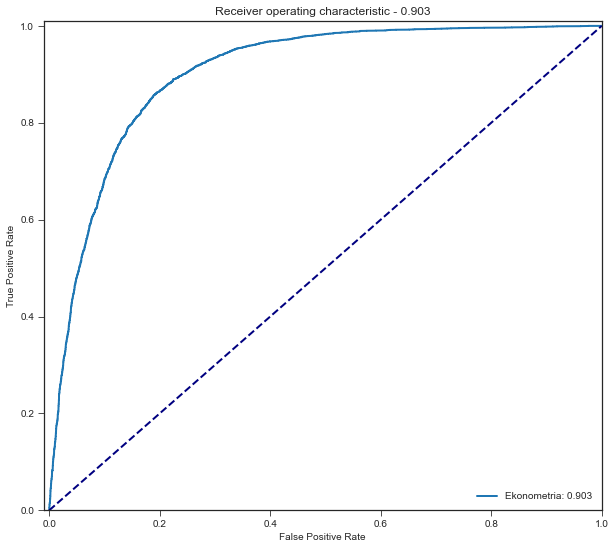

In [10]:
plotROCs([(true, pred, 'Ekonometria')])

## 2.5. Trenowanie modelu SVM

Przygotujmy zbiór danych do pracy nad SVM. Zakodujemy zmienne tak, aby były łatwo obsługiwane przez `sklearn`, który nie rekoduje automatycznie zmiennych nominalnych/kategorycznych na liczbowe. 

In [11]:
# Zaimportowanie ponownie zbioru, który dostosujemy do wymagań SVM:
df_o = pd.read_csv("data/bank-balanced.csv")
print(df_o.shape)
df_o.head()

(11162, 17)


age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

Na początek uporządkujmy nasze zmienne. Odseparujemy zmienną objaśnianą od objaśniających. Dodatkowo rozdzielimy zmienne na numeryczne oraz kategoryczne.

In [13]:
target = "deposit"

In [14]:
numFeatures = ['age', 'balance', 'duration', 'campaign', 'pdays','previous', 'day']

In [16]:
catFeatures = [ 'job', 'marital', 'education', 'default',  'housing', 'loan', 'contact',  'month', 'poutcome']

W celu rekodowania zmiennych kategorycznych na binarne, skorzystamy z funkcji `get_dummies`, zaznaczając opcję `drop_first` aby nie mieć kolumn dla poziomów bazowych w zmiennych dyskretnych.

In [17]:
# One hot encoding
dummLev = pd.get_dummies(df_o[catFeatures], drop_first=True)

# Połączenie zmiennych numerycznych, kategorycznych w postaci on hot encoding oraz targetu
df = pd.concat([df_o[numFeatures], dummLev, df_o[[target]]], axis=1)

In [18]:
# Sprawdźmy wymiary tabeli po rekodowaniu:
df.shape

(11162, 43)

In [19]:
# I jeszcze nazwy kolumn - widać, że nazwy poziomów zostały 
df.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'deposit'],
      dtype='object')

Przygotowujemy zmienną objasnianą pod kluczem target:

In [20]:
df[target].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

Znormalizujemy zmienne numeryczne (SVM jest to konieczny krok)

In [21]:
df[numFeatures] = df[numFeatures].apply(lambda x: (x-x.mean())/x.std())

Przygotujmy listę zmiennych w postaci zwykłej listy pythona:

In [22]:
features = df.columns.tolist()
features.remove(target)
print(features)

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


**UWAGA** W sytuacji gdy zbiór jest bardzo duży. Będzie bardzo trudno o szybkie rezultaty, kiedy wykorzystujemy więcej niż 1000-2000 obserwacji. Trudno wtedy wykorzystać pełnię potencjału tego algorytmu. Skłania nas to więc do:
* Ograniczenia liczby obserwacji i/lub zmiennych - wybranie najważniejszych, aby zmniejszyć problem nadmiernego dopasowania. Poza kernelem wielomianowym ograniczanie liczby zmiennych nie przyniesie jednak dużego przyspieszenia.
* Wykonanie wielu estymacji na podpróbkach i uśrednienie wyników (ensemble).

Zmodyfikujemy teraz naszą funkcję CV tak, aby wykorzystywała SVM.  Nasz zbiór ma ponad 10 tys. obserwacji. Jeden fold treningowy będzie miał więc 8000 obserwacji. **UWAGA!** Wprowadzamy samplowanie zbioru treningowego, aby umożliwić trening w dostatecznie szybkim czasie. Przez próbkowanie ograniczymy go do 5000. Nie będzie to więc idealne rozwiązanie, ale umożliwi szybkie uzyskanie wyników na potrzeby zajęć.

In [23]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.svm import SVC

# Przygotujmy prosty wrapper
def CVTestSVM(nFolds = 5, randomState=2020, debug=False):
    # Stworzenie obiektu do dzielenia zbioru na foldy:
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Listy na wyniki:
    testResults = []
    trainResults = []
    predictions = []
    indices = []
    
    # Pętla walidująca model w foldach: (to tutaj następuje sampling)
    for train, test in kf.split(df.index.values):
        # Przygotowanie estymatora
        clf = SVC(C=1, # wartość kary za błąd klasyfikacji (hiperparametr modelu
                  cache_size=500, 
                  kernel='linear', # Wybór kernela (narazie liniowy)
                  max_iter=-1, 
                  probability=True, # czy funkcja ma zwracać prawdopodobieństwa?
                  tol=0.001, 
                  verbose=False) # nie chcemy drukować wyników - sami przygotujemy print
        
        #Zmniejszenie zbioru treningowego przez sampling
        sampleSize = 5000
        X = df.iloc[train].sample(sampleSize)
        # Trenowanie modelu
        clf.fit(X[features], X[target])

        # Przygotowanie prognoz dla zbioru treningowego i testowego
        # UWAGA sklearn zwracał będzie dwie kolumny prawdopodobieństw dla obydwu klas
        predsTrain = clf.predict_proba(df.iloc[train][features])[:,1]
        preds = clf.predict_proba(df.iloc[test][features])[:,1]
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predictions.append(preds.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Policzenie dopasowania ROC AUC dla foldów
        trainScore = roc_auc_score((df[target].iloc[train]=="yes").astype(int), predsTrain)
        testScore = roc_auc_score((df[target].iloc[test]=="yes").astype(int), preds)
        
        # Zapisanie wyników z foldów do listy:
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices

In [24]:
trainResults, testResults, predictions, indices = CVTestSVM(debug = True)
print(np.mean(testResults))

Train AUC: 0.9042533006601573 Valid AUC: 0.9033368520669749
Train AUC: 0.9029205715482006 Valid AUC: 0.9097604247666795
Train AUC: 0.9042628258551912 Valid AUC: 0.9058020576564962
Train AUC: 0.9066314783849265 Valid AUC: 0.8908249506075594
Train AUC: 0.9041242610060616 Valid AUC: 0.9022076336247025
0.9023863837444825


## 2.6. Tuning hiperparametrów SVM
Model SVM, w zależności od kernela, ma jeden lub więcej hiperparametrów, które pozwalają dostroić model do konkretnego zbioru danych. Wybór optymalnych wartości hiperparametrów dokonywany jest poprzez walidację krzyżową. 

Z tej perspektywy aktualna postać funkcji walidującej ma istotne ograniczenia i jest przez to niewygodna. Żeby wybrać optymalne wartości hiperparametrów musielibyśmy tworzyć inną postać funkcji dla każdego wektora parametrów. Alternatywnie, wszystkie opcje inicjacji obiektu `SVC` moglibyśmy wpisywać jako argumenty w dwóch miejscach - jako parametry funkcji `CVTestSVM` i w wywołaniu funkcji `SVC`. Jednakże każda zmiana funkcji kernelowej wymaga zmiany naszego kodu (różne kernele mają różne hiperparametry). W praktyce w Pythonie możemy rozwiązać ten problem dzięki operatorom gwiazdek. Na stałe wpiszemy tylko te parametry, których raczej nie będziemy zmieniać.

In [25]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.svm import SVC

# Przygotujmy wrapper - na końcu pojawiają się *args i **kwargs - listy parametrów podawane w postaci słownika
# lub listy.
def CVTestSVM(nFolds = 5, randomState=2020, debug=False, sampleSize = 5000, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Listy na wyniki:
    testResults = []
    trainResults = []
    predictions = []
    indices = []
    
    for train, test in kf.split(df.index.values):
        # Przygotowanie estymatora
        clf = SVC(probability=True, max_iter=-1, random_state=2020, tol=0.001, cache_size=500, *args, **kwargs)
        # Wyświetlenie wywołania funkcji
        if debug:
            print(clf)
        #Zmniejszenie zbioru treningowego
        sampleSize = sampleSize
        X = df.iloc[train].sample(sampleSize)
        # Trenowanie modelu
        clf.fit(X[features], X[target])

        # Przygotowanie prognoz dla zbioru traeningowego i testowego
        # UWAGA Sklearn zwracał będzie dwie kolumny prawdopodobieństw dla obydwu klas
        predsTrain = clf.predict_proba(df.iloc[train][features])[:,1]
        preds = clf.predict_proba(df.iloc[test][features])[:,1]
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predictions.append(preds.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Policzenie statystyka lda każdego foldu
        trainScore = roc_auc_score((df[target].iloc[train]=="yes").astype(int), predsTrain)
        testScore = roc_auc_score((df[target].iloc[test]=="yes").astype(int), preds)
        
        # Zapisanie wyników do list
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices


Teraz możemy już wygodnie przeprowadzić eksperymenty!

In [26]:
# trenowanie modelu liniowego (z domyślnym hiperparametrem C)
trainResults, testResults, predictions, indices = CVTestSVM(debug=False, kernel="linear")
# wyświetlenie wyników dla zbioru treningowego i testowego
print(np.mean(trainResults), np.mean(testResults))

0.9045829648182131 0.9033176688919072


In [27]:
# Zapisanie wyników do słownika
resultM2 = {
    "name":"SVM Lin",
    "description":"Pierwszy prosty model SVM, z domyślnym C=1 i liniowym kernelem",
    "specification":'kernel="linear"',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

Aby wykonać eksperyment z kernelem wielomianowym stopnia 2 wystarczy wywołać komendę:

In [28]:
# SVM z kernelem wielomianowym, stopnia drugiego
trainResults, testResults, predictions, indices = CVTestSVM(debug=True, degree=2, kernel="poly")
print(np.mean(testResults))
# wyświetlenie wyników dla zbioru treningowego i testowego
print(np.mean(trainResults), np.mean(testResults))

SVC(cache_size=500, degree=2, kernel='poly', probability=True,
    random_state=2020)
Train AUC: 0.9222512029738027 Valid AUC: 0.9142867012755811
SVC(cache_size=500, degree=2, kernel='poly', probability=True,
    random_state=2020)
Train AUC: 0.9210422114017696 Valid AUC: 0.9194679629906897
SVC(cache_size=500, degree=2, kernel='poly', probability=True,
    random_state=2020)
Train AUC: 0.9212707527099913 Valid AUC: 0.9168253322735087
SVC(cache_size=500, degree=2, kernel='poly', probability=True,
    random_state=2020)
Train AUC: 0.9231257655049969 Valid AUC: 0.903495483658527
SVC(cache_size=500, degree=2, kernel='poly', probability=True,
    random_state=2020)
Train AUC: 0.9230555247138561 Valid AUC: 0.9075832497108476
0.9123317459818308
0.9221490914608832 0.9123317459818308


In [29]:
# Zapisanie wyników do słownika
resultM3 = {
    "name":"SVM Poly 2",
    "description":"Pierwszy prosty model SVM, z domyślnym C=1 i kernelem wielomianowym stopnia 2",
    "specification":'degree=2,kernel="poly"',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

### Pierwsze porównanie wyników
Zobaczmy, jak możemy teraz skorzystać z naszej pracy na automatyzacji tworzenia wykresu ROC.

In [30]:
res2plot = []
true = (df[target]=="yes").astype(int).sort_index()
for result in [resultM1, resultM2, resultM3]:
    # Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
    pred = pd.Series(sum(result["predictions"], []), index=sum(result["indices"], [])).sort_index()
    res2plot.append((true, pred, result["name"]))

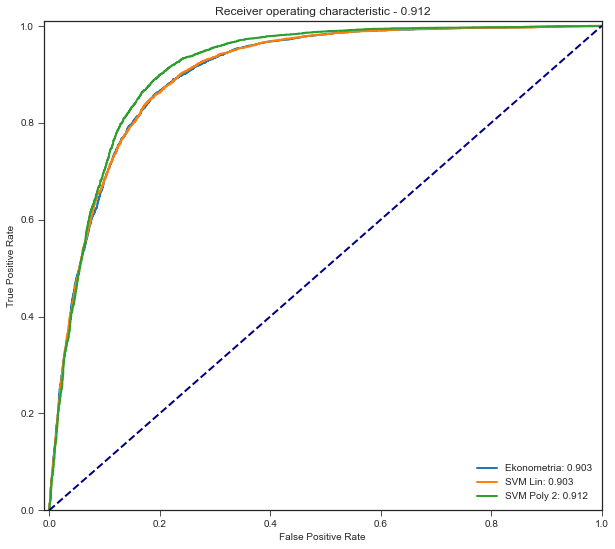

In [31]:
# Wywołujemy funkcję do rysowania
plotROCs(res2plot)

Jak widać różnice na tę chwilę są raczej kosmetyczne. Dodajmy jeszcze jeden eksperyment, który pozwoli nam przetestować kernel RBF.

In [32]:
trainResults, testResults, predictions, indices = CVTestSVM(debug=True, kernel="rbf",)
# wyświetlenie wyników dla zbioru treningowego i testowego
print(np.mean(trainResults), np.mean(testResults))

SVC(cache_size=500, probability=True, random_state=2020)
Train AUC: 0.9292790310380074 Valid AUC: 0.91150987414502
SVC(cache_size=500, probability=True, random_state=2020)
Train AUC: 0.9285485777037934 Valid AUC: 0.9207506830172216
SVC(cache_size=500, probability=True, random_state=2020)
Train AUC: 0.9271080185701424 Valid AUC: 0.9199819004670354
SVC(cache_size=500, probability=True, random_state=2020)
Train AUC: 0.931282555407065 Valid AUC: 0.9091401034335818
SVC(cache_size=500, probability=True, random_state=2020)
Train AUC: 0.9296071565347661 Valid AUC: 0.9111465751050822
0.9291650678507549 0.9145058272335882


In [33]:
resultM4 = {
    "name":"SVM RBF",
    "description":"Pierwszy prosty model SVM, z domyślnym C=1 i kernelem RBF",
    "specification":'kernel="rbf",',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

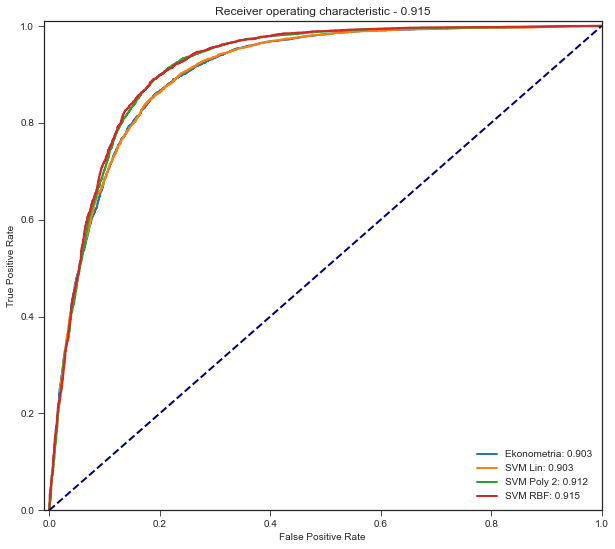

In [34]:
res2plot = []
true = (df[target]=="yes").astype(int).sort_index()
for result in [resultM1, resultM2, resultM3, resultM4]:
    # Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
    pred = pd.Series(sum(result["predictions"], []), index=sum(result["indices"], [])).sort_index()
    res2plot.append((true, pred, result["name"]))
    
# Wywołujemy funkcję do rysowania
plotROCs(res2plot)

Jak widać, wygląda na to, ze bez dodatkowej pracy nad modelem, kernel RBF daje najlepsze wyniki. Co więcej nie testowaliśmy jak na razie żadnych zmian w wartości hiperparametrów. Na koniec sprawdźmy wpływ wielkości parametru C na nasze oszacowanie. Zobaczymy czy uda nam się jeszcze poprawić model.

In [44]:
testCvalue = []
for c in [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10, 25, 50, 100]:
    trainResults, testResults, predictions, indices = CVTestSVM(debug=False, kernel="rbf", C=c)
    print(c, np.mean(testResults))
    testCvalue.append(
        {
        "name":f"SVM RBF = {c}",
        "description":"Testy z C i kernelem RBF",
        "specification":'kernel="rbf" C=c,',
        "trainResults":trainResults.copy(),
        "testResults":testResults.copy(),
        "predictions":predictions.copy(),
        "indices":indices.copy(),
    }
    )

0.01 0.8528050609549276
0.1 0.8999359044741491
0.25 0.9081260624178433
0.5 0.9118590802310621
1 0.9134357845444366
2 0.913540554812678
5 0.9129288530562351
10 0.9110349713463757
25 0.9000507174034975
50 0.8905747095327481
100 0.8840986438190324


Wydaje się, że najlepszy wynik uzyskujemy dla parametru C na poziomie 1 - 10. Specyfikację tego modelu mamy przechowaną na liście testCvalue pod pozycją 5.

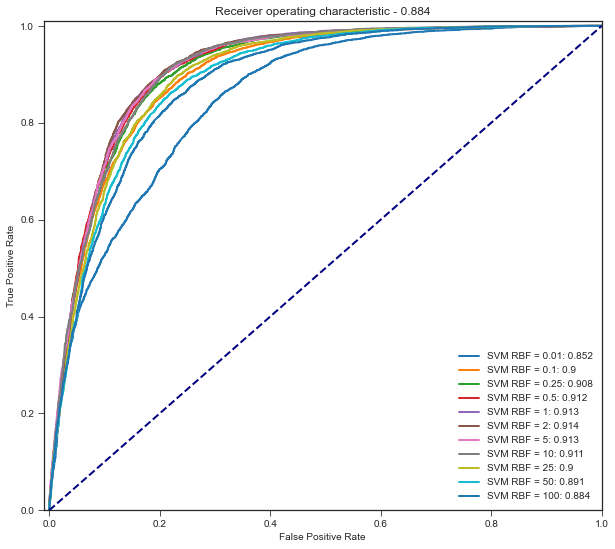

In [45]:
res2plot = []
true = (df[target]=="yes").astype(int).sort_index()
for result in testCvalue:
    # Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
    pred = pd.Series(sum(result["predictions"], []), index=sum(result["indices"], [])).sort_index()
    res2plot.append((true, pred, result["name"]))
    
# Wywołujemy funkcję do rysowania
plotROCs(res2plot)

Spróbujmy dla kernela RBF wybrać optymalną wartość parametru `gamma`. Oczywiście w warunkach biznesowych, dysponując większą ilością czasu, wykonalibyśmy pełną walidację dla obydwu parametrów. Na szkoleniu goni nas czas, więc optymalnej `gammy` poszukamy dla ustalonego `C`.

In [46]:
testCvalue2 = []
for gamma in [0.01, 0.25, 0.5, 1, 2, 5, 10]:
    trainResults, testResults, predictions, indices = CVTestSVM(debug=False, kernel="rbf", C=2, gamma = gamma)
    print(gamma, np.mean(testResults))
    testCvalue2.append(
        {
        "name":f"SVM RBF C = {2}, gamma = {gamma}",
        "description":"Testy z C i kernelem RBF",
        "specification":'kernel="rbf" C=c,',
        "trainResults":trainResults.copy(),
        "testResults":testResults.copy(),
        "predictions":predictions.copy(),
        "indices":indices.copy(),
    }
    )

0.01 0.9080270003052153
0.25 0.9054313276022059
0.5 0.8924344060137939
1 0.8650879026731582
2 0.8288046730149965
5 0.7212171204295388
10 0.7466627441648325


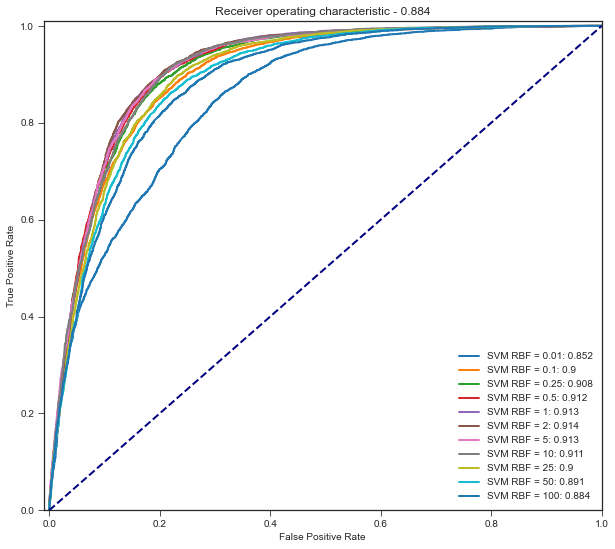

In [47]:
res2plot = []
true = (df[target]=="yes").astype(int).sort_index()
for result in testCvalue:
    # Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
    pred = pd.Series(sum(result["predictions"], []), index=sum(result["indices"], [])).sort_index()
    res2plot.append((true, pred, result["name"]))
    
# Wywołujemy funkcję do rysowania
plotROCs(res2plot)

In [49]:
testCvalue[5]["name"]

'SVM RBF = 2'

In [50]:
testCvalue2[0]["name"]

'SVM RBF C = 2, gamma = 0.01'

Kiedy nie zmienialiśmy gamma, model był odrobinę lepszy - i ten wariant weźmiemy pod uwagę w dalszych porównaniach.

### Zapisywanie wyników
Kiedy pracujemy z własnymi strukturami danych czy nawet prostymi słwonikami, chcielibyśmy móc zapisać całą strukturę danych, a następnie odtworzyć ją przy następnym uruchomieniu tego samego programu lub pracując z innym skryptem. Do tego celu wykorzystuje się binarny zrzut pamięci, pickle.

W naszym przypadku dobrze by było zapisać najlepsze z uzykanych wyników dla prostego modelu ekonometrycznego oraz najlepszy z modeli stworzony z wykorzystaniem SVM. W dalszej części wykorzystamy zapisane pliki aby efektywnie porównywać wyniki pomiędzy algorytmami.

In [51]:
import pickle

# Otwieramy plik do zapisu binarnego z wykorzystenim with
with open("model_ekonometria_1.p", "wb") as fp:
    # Zapisujemy obiekt do wskaźnika pliku
    pickle.dump(resultM1, fp)
    
with open("model_svm_1.p", "wb") as fp:
    # Zapisujemy obiekt do wskaźnika pliku
    pickle.dump(testCvalue[5], fp)